# Preliminary Data analysis for Three Body Problem
## Information about the dataset
This dataset describes multiple trajectories of 3 objects. 
Each trajectory has 257 lines representing the movements of the objext over a time span of 10 seconds.
Train data: <br>
| Variable  | Description                                      |
|-----------|--------------------------------------------------|
| `t`       | timestep                                         |
| `x_1`     | coordinate x of the position of object 1         |
| `y_1`     | coordinate y of the position of object 1         |
| `v_x_1`   | coordinate x of the velocity of object 1         |
| `v_y_1`   | coordinate y of the velocity of object 1         |
| `x_2`     | coordinate x of the position of object 2         |
| `y_2`     | coordinate y of the position of object 2         |
| `v_x_2`   | coordinate x of the velocity of object 2         |
| `v_y_2`   | coordinate y of the velocity of object 2         |
| `x_3`     | coordinate x of the position of object 3         |
| `y_3`     | coordinate y of the position of object 3         |
| `v_x_3`   | coordinate x of the velocity of object 3         |
| `v_y_3`   | coordinate y of the velocity of object 3         |

Test data:<br>

| Variable  | Description                                                    |
|-----------|----------------------------------------------------------------|
| `t`       | timestep                                                       |
| `x0_1`    | coordinate x of the position of object 1 at time t=0           |
| `y0_1`    | coordinate y of the position of object 1 at time t=0           |
| `x0_2`    | coordinate x of the position of object 2 at time t=0           |
| `y0_2`    | coordinate y of the position of object 2 at time t=0           |
| `x0_3`    | coordinate x of the position of object 3 at time t=0           |
| `y0_3`    | coordinate y of the position of object 3 at time t=0           |

For the test data, we only have the initial positions, since we assume that the initial velocity is zero


In [2]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

## The Data

In [3]:
df = pd.read_csv("../data/mlNOVA/mlNOVA/X_train.csv")

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1285000 entries, 0 to 1284999
Data columns (total 14 columns):
 #   Column  Non-Null Count    Dtype  
---  ------  --------------    -----  
 0   t       1285000 non-null  float64
 1   x_1     1285000 non-null  float64
 2   y_1     1285000 non-null  float64
 3   v_x_1   1285000 non-null  float64
 4   v_y_1   1285000 non-null  float64
 5   x_2     1285000 non-null  float64
 6   y_2     1285000 non-null  float64
 7   v_x_2   1285000 non-null  float64
 8   v_y_2   1285000 non-null  float64
 9   x_3     1285000 non-null  float64
 10  y_3     1285000 non-null  float64
 11  v_x_3   1285000 non-null  float64
 12  v_y_3   1285000 non-null  float64
 13  Id      1285000 non-null  int64  
dtypes: float64(13), int64(1)
memory usage: 137.3 MB


In [5]:
df.head()

,t,x_1,y_1,v_x_1,v_y_1,x_2,y_2,v_x_2,v_y_2,x_3,y_3,v_x_3,v_y_3,Id
0,0.000000,1.000000,0.000000,0.000000,0.000000,-0.266467,0.859196,0.000000,0.000000,-0.733533,-0.859196,0.000000,0.000000,0
1,0.039062,0.999548,0.000092,-0.023159,0.004731,-0.266261,0.858781,0.010574,-0.021257,-0.733287,-0.858874,0.012584,0.016526,1
2,0.078125,0.998190,0.000370,-0.046362,0.009474,-0.265641,0.857535,0.021172,-0.042552,-0.732549,-0.857905,0.025189,0.033078,2
3,0.117188,0.995925,0.000833,-0.069654,0.014239,-0.264606,0.855456,0.031817,-0.063924,-0.731318,-0.856289,0.037837,0.049685,3
4,0.156250,0.992747,0.001483,-0.093080,0.019040,-0.263154,0.852540,0.042533,-0.085412,-0.729592,-0.854022,0.050548,0.066372,4


In [6]:
df.tail()

,t,x_1,y_1,v_x_1,v_y_1,x_2,y_2,v_x_2,v_y_2,x_3,y_3,v_x_3,v_y_3,Id
1284995,9.84375,-0.022787,-0.354678,-1.450539,-0.511101,-0.128897,-0.618452,1.066492,-0.497032,0.151684,0.973131,0.384048,1.008133,1284995
1284996,9.88281,-0.082072,-0.384254,-1.556362,-1.038875,-0.084507,-0.627569,1.177829,0.065469,0.166578,1.011822,0.378533,0.973406,1284996
1284997,9.92188,-0.140434,-0.438907,-1.348462,-1.794786,-0.040823,-0.610311,0.975436,0.853069,0.181257,1.049218,0.373027,0.941717,1284997
1284998,9.96094,-0.177344,-0.524277,-0.380080,-2.492241,-0.018380,-0.561151,0.012292,1.579595,0.195724,1.085428,0.367788,0.912645,1284998
1284999,10.00000,-0.163264,-0.618197,1.029575,-2.079003,-0.046730,-0.502346,-1.392434,1.193499,0.209994,1.120543,0.362860,0.885505,1284999


In [7]:
df.describe()

,t,x_1,y_1,v_x_1,v_y_1,x_2,y_2,v_x_2,v_y_2,x_3,y_3,v_x_3,v_y_3,Id
count,1.285000e+06,1.285000e+06,1.285000e+06,1.285000e+06,1.285000e+06,1.285000e+06,1.285000e+06,1.285000e+06,1.285000e+06,1.285000e+06,1.285000e+06,1.285000e+06,1.285000e+06,1.285000e+06
mean,4.145262e+00,-2.812879e-01,-1.095159e-01,-1.841267e-01,-1.650011e-02,7.171403e-03,-8.201144e-02,3.247712e-02,-8.360838e-02,2.741165e-01,1.915273e-01,1.516496e-01,1.001085e-01,6.424995e+05
std,3.209813e+00,1.695764e+00,1.167686e+00,8.775115e-01,8.064175e-01,1.062984e+00,1.038606e+00,9.362290e-01,9.751777e-01,1.443411e+00,1.683294e+00,7.878988e-01,8.709405e-01,3.709477e+05
min,0.000000e+00,-3.082300e+01,-1.785773e+01,-7.299333e+01,-2.310928e+01,-3.083340e+01,-5.245081e+01,-2.589555e+01,-4.828901e+01,-1.743999e+01,-3.316000e+01,-3.097054e+01,-2.550938e+01,0.000000e+00
25%,1.054690e+00,-4.118489e-01,-3.928434e-01,-5.782370e-01,-2.266108e-01,-3.295574e-01,-1.918623e-01,-2.983937e-01,-4.984175e-01,-4.324075e-01,-4.472183e-01,-1.019181e-01,-2.062900e-01,3.212498e+05
50%,3.945310e+00,0.000000e+00,0.000000e+00,-6.909794e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-1.306061e-04,6.181826e-02,1.402483e-02,6.424995e+05
75%,6.953120e+00,5.008268e-01,2.634242e-01,1.321657e-01,2.444148e-01,2.103091e-01,2.683916e-01,3.880151e-01,3.262901e-01,5.005791e-01,3.508870e-01,4.864241e-01,4.975648e-01,9.637492e+05
max,1.000000e+01,1.634061e+01,2.627623e+01,2.350346e+01,3.467168e+01,1.550696e+01,3.567946e+01,7.271823e+01,2.311835e+01,6.165640e+01,2.773554e+01,2.596499e+01,4.828874e+01,1.284999e+06


## Some Visualizations

In [8]:
idx = np.hstack((0, df[df.t == 10].index.values +1))

In [9]:
def plot_indx(k):
    """Given an index k, prints the respective trajetories

    Parameters
    ----------
    k : int
        The row of the trajetory

    """
    print(k) # The index being used
    pltidx = range(idx[k], 257+idx[k])
    pltsquare = idx[k]

    # Plot the tragetories
    plt.plot(df.x_1[pltidx], df.y_1[pltidx])
    plt.plot(df.x_2[pltidx], df.y_2[pltidx])
    plt.plot(df.x_3[pltidx], df.y_3[pltidx])

    # Plot the initial positions
    plt.plot(df.x_1[pltsquare], df.y_1[pltsquare], 's')
    plt.plot(df.x_2[pltsquare], df.y_2[pltsquare], 's')
    plt.plot(df.x_3[pltsquare], df.y_3[pltsquare], 's')

    plt.show()

45


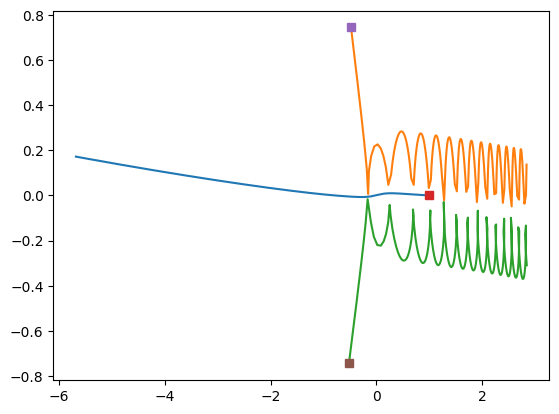

In [10]:
# Selecting a random index from the dataset
k = np.random.randint(idx.shape[0])
plot_indx(k)

### Stable Trajectories
Stable trajectories occour when one of the objects leaves the sphere of influence of the other two and the trajectories of the remainig objects stabilize around each other.

3908


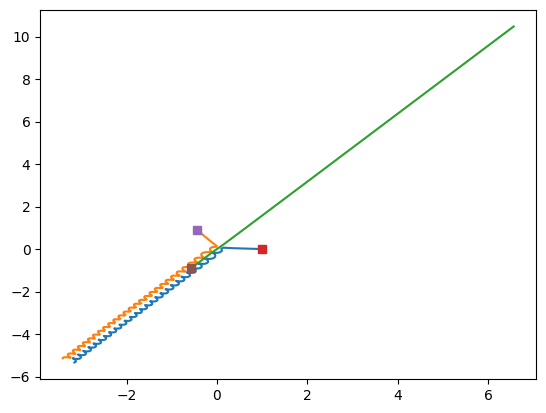

In [11]:
k = 3908
plot_indx(k)

### Chaotic Trajectories
This trajectories don't seem to have a pattern, say they are refered as chaotic

1304


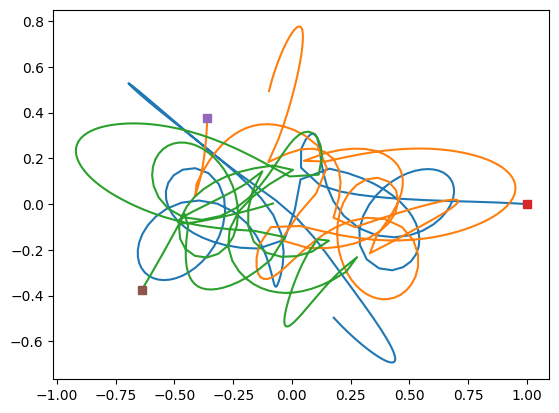

In [12]:
k = 1304
plot_indx(k)

### Colisions
When the 3 objects colide, the following lines until the end of the sample is filled with zeros. These zeros are meaningless

619


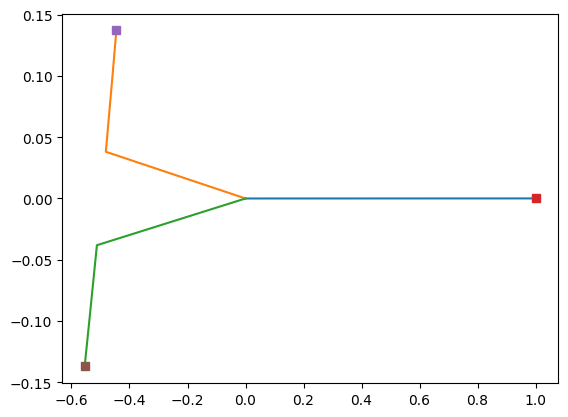

In [17]:
k = 619
plot_indx(k)

In [21]:
df['trajectory_id'] = df['Id'] // 257 

df[df['trajectory_id'] == 618]

,t,x_1,y_1,v_x_1,v_y_1,x_2,y_2,v_x_2,v_y_2,x_3,y_3,v_x_3,v_y_3,Id,trajectory_id
158826,0.000000,1.000000,0.000000,0.000000,0.000000,-0.478954,0.186567,0.000000,0.000000,-0.521046,-0.186567,0.000000,0.000000,158826,618
158827,0.039062,0.999337,0.000003,-0.033980,0.000172,-0.479226,0.181094,-0.014232,-0.282976,-0.520111,-0.181097,0.048212,0.282804,158827,618
158828,0.078125,0.997343,0.000013,-0.068136,0.000325,-0.480120,0.163979,-0.032736,-0.603820,-0.517223,-0.163992,0.100873,0.603495,158828,618
158829,0.117188,0.994009,0.000028,-0.102644,0.000442,-0.481944,0.132504,-0.064144,-1.038210,-0.512065,-0.132533,0.166788,1.037769,158829,618
158830,0.156250,0.989317,0.000047,-0.137669,0.000504,-0.485721,0.077728,-0.147028,-1.920490,-0.503596,-0.077775,0.284698,1.919986,158830,618
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
159078,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,159078,618
159079,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,159079,618
159080,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,159080,618
159081,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,159081,618
